In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Convolution2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model
from keras.models import load_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, "dataset")

In [3]:
orig_dataset = os.path.join(DATA_PATH, "train")

save_small_data = os.path.join(DATA_PATH, "small_data")
if not os.path.exists(save_small_data):
    os.mkdir(save_small_data)

In [4]:
small_train_data = os.path.join(save_small_data, "train")
if not os.path.exists(small_train_data):
    os.mkdir(small_train_data)
    
small_validation_data = os.path.join(save_small_data, "validation")
if not os.path.exists(small_validation_data):
    os.mkdir(small_validation_data)

small_test_data = os.path.join(save_small_data, "test")
if not os.path.exists(small_test_data):
    os.mkdir(small_test_data)

In [5]:
train_dogs_data = os.path.join(small_train_data, 'dogs')
if not os.path.exists(train_dogs_data):
    os.mkdir(train_dogs_data)

train_cats_data = os.path.join(small_train_data, 'cats')
if not os.path.exists(train_cats_data):
    os.mkdir(train_cats_data)

In [6]:
validation_dogs_data = os.path.join(small_validation_data, 'dogs')
if not os.path.exists(validation_dogs_data):
    os.mkdir(validation_dogs_data)
    
validation_cats_data = os.path.join(small_validation_data, 'cats')
if not os.path.exists(validation_cats_data):
    os.mkdir(validation_cats_data)

In [7]:
test_dogs_data = os.path.join(small_test_data, 'dogs')
if not os.path.exists(test_dogs_data):
    os.mkdir(test_dogs_data)
    
test_cats_data = os.path.join(small_test_data, 'cats')
if not os.path.exists(test_cats_data):
    os.mkdir(test_cats_data)

In [8]:
mv_cats = ["cat.{}.jpg".format(i) for i in range(1000)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(train_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，訓練的貓咪已全部複製完畢")

mv_cats = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(validation_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，驗證的貓咪已全部複製完畢")

mv_cats = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for mv_cat in mv_cats:
    src = os.path.join(orig_dataset, mv_cat)
    des = os.path.join(test_cats_data, mv_cat)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，測試的貓咪已全部複製完畢")

報告班長，訓練的貓咪已全部複製完畢
報告班長，驗證的貓咪已全部複製完畢
報告班長，測試的貓咪已全部複製完畢


In [9]:
mv_dogs = ["dog.{}.jpg".format(i) for i in range(1000)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(train_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，訓練的狗狗已全部複製完畢")

mv_dogs = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(validation_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，驗證的狗狗已全部複製完畢")

mv_dogs = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for mv_dog in mv_dogs:
    src = os.path.join(orig_dataset, mv_dog)
    des = os.path.join(test_dogs_data, mv_dog)
    if not os.path.exists(des):
        shutil.copyfile(src, des)
print("報告班長，測試的狗狗已全部複製完畢")

報告班長，訓練的狗狗已全部複製完畢
報告班長，驗證的狗狗已全部複製完畢
報告班長，測試的狗狗已全部複製完畢


In [10]:
print('報告班長 訓練貓咪集，應到1000隻，實到', len(os.listdir(train_cats_data)),'隻，報告完畢。')
print('報告班長 訓練狗狗集，應到1000隻，實到', len(os.listdir(train_dogs_data)),'隻，報告完畢。')
print('報告班長 驗證貓咪集，應到500 隻，實到', len(os.listdir(validation_cats_data)),' 隻，報告完畢。')
print('報告班長 驗證狗狗集，應到500 隻，實到', len(os.listdir(validation_dogs_data)),' 隻，報告完畢。')
print('報告班長 測試貓咪集，應到500 隻，實到', len(os.listdir(test_cats_data)),' 隻，報告完畢。')
print('報告班長 測試狗狗集，應到500 隻，實到', len(os.listdir(test_dogs_data)),' 隻，報告完畢。')

報告班長 訓練貓咪集，應到1000隻，實到 1000 隻，報告完畢。
報告班長 訓練狗狗集，應到1000隻，實到 1000 隻，報告完畢。
報告班長 驗證貓咪集，應到500 隻，實到 500  隻，報告完畢。
報告班長 驗證狗狗集，應到500 隻，實到 500  隻，報告完畢。
報告班長 測試貓咪集，應到500 隻，實到 500  隻，報告完畢。
報告班長 測試狗狗集，應到500 隻，實到 500  隻，報告完畢。


In [11]:
def pop(self):
    '''Removes a layer instance on top of the layer stack.
    '''
    if not self.outputs:
        raise Exception('Sequential model cannot be popped: model is empty.')
    else:
        self.layers.pop()
        if not self.layers:
            self.outputs = []
            self.inbound_nodes = []
            self.outbound_nodes = []
        else:
            self.layers[-1].outbound_nodes = []
            self.outputs = [self.layers[-1].output]
        self.built = False

In [12]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()
model.load_weights('all_picture.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [13]:
model.pop()
model.pop()
model.pop()
model.pop()
model.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

/home/letitgo/anaconda3/envs/jacky_env/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [14]:
abc_model = models.Sequential() # 產生一個新的網絡模型結構
abc_model.add(model)        # 把預訓練的卷積基底疊上去
abc_model.add(Flatten())
abc_model.add(Dense(512, activation='relu'))
abc_model.add(BatchNormalization())
abc_model.add(Dropout(0.5))
abc_model.add(Dense(1, activation='sigmoid'))
abc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 14, 14, 128)       94144     
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               12845568  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 12,942,273
Trainable params: 12,940,801
Non-trainable params: 1,472
____________________________________________________________

In [15]:
model.trainable = False
target_number = 128

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        # 這是圖像資料的目錄
        small_train_data,
        # 所有的圖像大小會被轉換成150x150
        target_size=(target_number, target_number),
        batch_size=32,
        # 由於這是一個二元分類問題, y的lable值也會被轉換成二元的標籤
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        small_validation_data,
        target_size=(target_number, target_number),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
abc_model.compile(loss='binary_crossentropy',
              optimizer="adadelta",
              metrics=['acc'])

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]
#callbacks = [earlystop]

In [28]:
history = abc_model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=callbacks)

Epoch 1/25
50/50 [==============================] - 36s 715ms/step - loss: 0.2044 - acc: 0.9163 - val_loss: 0.2357 - val_acc: 0.9124
Epoch 2/25
50/50 [==============================] - 34s 690ms/step - loss: 0.2203 - acc: 0.9050 - val_loss: 0.2260 - val_acc: 0.9124
Epoch 3/25
50/50 [==============================] - 35s 696ms/step - loss: 0.2139 - acc: 0.9069 - val_loss: 0.2241 - val_acc: 0.9156
Epoch 4/25
50/50 [==============================] - 35s 690ms/step - loss: 0.1971 - acc: 0.9187 - val_loss: 0.2322 - val_acc: 0.9117
Epoch 5/25
50/50 [==============================] - 35s 692ms/step - loss: 0.2056 - acc: 0.9194 - val_loss: 0.2385 - val_acc: 0.9086

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.015625.
Epoch 6/25
50/50 [==============================] - 34s 688ms/step - loss: 0.2049 - acc: 0.9156 - val_loss: 0.2284 - val_acc: 0.9156
Epoch 7/25
50/50 [==============================] - 35s 691ms/step - loss: 0.2000 - acc: 0.9250 - val_loss: 0.2289 - val_acc: 0.9124



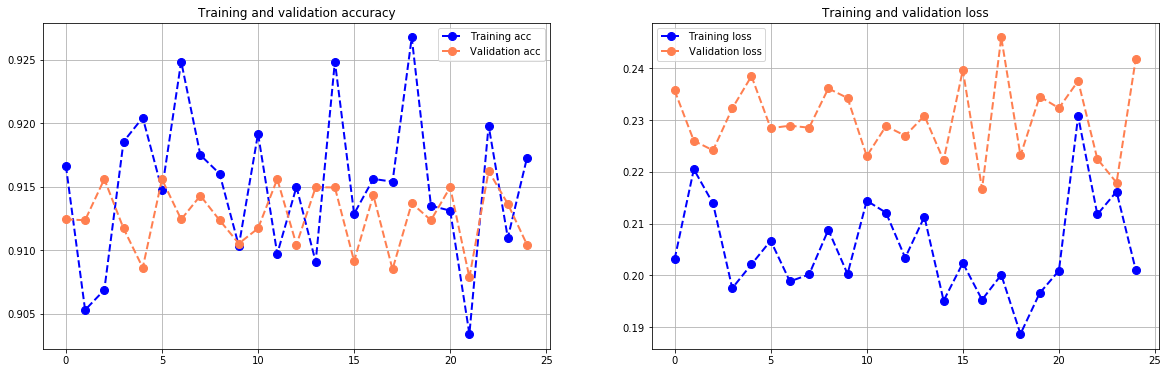

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(epochs, acc, linewidth = '2', label = "Training acc", color='blue', linestyle='--', marker='o', markersize=8)
plt.plot(epochs, val_acc, linewidth = '2', label = "Validation acc", color='coral', linestyle='--', marker='o', markersize=8)
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.grid(True)
plt.plot(epochs, loss, linewidth = '2', label = "Training loss", color='blue', linestyle='--', marker='o', markersize=8)
plt.plot(epochs, val_loss, linewidth = '2', label = "Validation loss", color='coral', linestyle='--', marker='o', markersize=8)
plt.title('Training and validation loss')
plt.legend()

plt.show()